# Relatório

Este relatório explora e discute os resultados de diferentes técnicas para redução de dimensionalidade como o Piecewise Aggregate Approximation (PAA) e Autoencoders aplicados a séries temporais, utilizando a métrica Dynamic Time Warping (DTW) para avaliação de desempenho.

### Datasets utilizados:

- ACSF1
- CinCECGTors
- EOGHorizontalSigna
- EOGVerticalSigna
- EthanolLeve
- HandOutline
- Haptic
- HouseTwent
- InlineSkat
- Malla
- MixedShapesRegularTrai
- MixedShapesSmallTrai
- Phonem
- PigAirwayPressur
- PigArtPressur
- PigCV
- Roc
- SemgHandGenderCh
- SemgHandMovementCh
- SemgHandSubjectCh
- StarLightCurve

In [2]:
# Algumas importações básicas necessárias para análise dos resultados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Piecewise Aggregate Approximation (PAA)

Iniciaremos as análises pelos resultados obtidos com a técnica PAA.

In [3]:
# Começamos carregando os resultados dos testes de DTW obtidos nesta pesquisa.

# Para isso definimos o caminho onde sera carregado o resultados dos testes
results_path = '../tests/dtw/paa/results.csv'
# E o link do repositório onde os resultados estão armazenados
url = 'https://drive.google.com/uc?id=1b09xr9EIz9RjFFV34SyYF0f2N84ilOL-'

# Baixa o arquivo do Google Drive e carrega como DataFrame
import gdown
gdown.download(url, results_path, quiet=False)

paa_results = pd.read_csv(results_path)
paa_results.head()

Downloading...
From (original): https://drive.google.com/uc?id=1b09xr9EIz9RjFFV34SyYF0f2N84ilOL-
From (redirected): https://drive.google.com/uc?id=1b09xr9EIz9RjFFV34SyYF0f2N84ilOL-&confirm=t&uuid=f1831766-b8e4-45b6-b47e-378461023923
To: c:\PUC\pibic\time-series-dimensionality-reduction\tests\dtw\paa\results.csv
100%|██████████| 228M/228M [00:12<00:00, 17.5MB/s] 


,dataset,original_size,reduction_rate,reduced_size,aggregation,instance_index,dtw
0,ACSF1,1460,0.9,146,average,0,1.530131
1,ACSF1,1460,0.9,146,average,1,1.476281
2,ACSF1,1460,0.9,146,average,2,1.554030
3,ACSF1,1460,0.9,146,average,3,1.525567
4,ACSF1,1460,0.9,146,average,4,1.596378


Cada linha deste DataFrame representa uma série temporal, a legenda do siginificado de cada coluna é a seguinte:

- **dataset:** Nome do dataset
- **original_size:** Tamanho original da série temporal (Num de pontos)
- **reduction_rate:** Taxa de redução aplicada (%) sobre o tamanho original
- **reduced_size:** Tamanho da série temporal após redução (Num de pontos)
- **aggregation:** Técnica de agregação utilizada pelo PAA
- **instance_index:** Índice da instância da série temporal no dataset
- **dtw:** Distância DTW entre a série temporal original e a reduzida (0 indica que não houve perda de informação)


### 1.1 Análises por técnica de agregação

In [4]:
# Lista todos o métodos de agregação utilizados pelo PAA
aggs = paa_results['aggregation'].unique()

for agg in aggs:
    print(f"- {agg}")

- average
- max
- min
- sum
- variance
- std
- iqr
- first
- central
- last
- max-min
- avg-max
- avg-min
- random


In [ ]:
# Agrupa os resultados por técnica de agregação e calcula a média da distância DTW
agg_dtw_means = paa_results.groupby('aggregation')['dtw'].mean().reset_index()
# Ordena os resultados pela distância DTW média
agg_dtw_means.sort_values(by='dtw', ascending=True, inplace=True)
# Renomeia a coluna de dtw para average_dtw
agg_dtw_means.rename(columns={'dtw': 'average_dtw'}, inplace=True)

agg_dtw_means

,aggregation,average_dtw
0,average,0.032108
6,last,0.032254
7,max,0.032799
3,central,0.034031
10,random,0.035034
4,first,0.035411
9,min,0.038156
12,sum,0.065143
11,std,0.571533
2,avg-min,0.573566


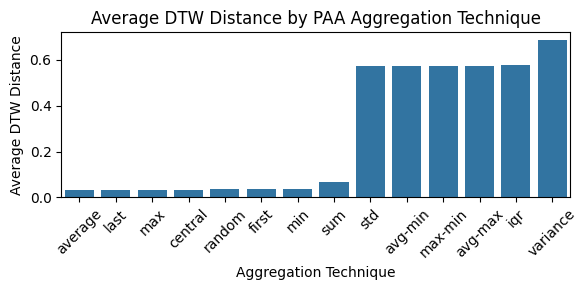

In [6]:
# Plota um gráfico de barras com os resultados médios de DTW por técnica de agregação
plt.figure(figsize=(6, 3))
sns.barplot(data=agg_dtw_means, x='aggregation', y='average_dtw')
plt.title('Average DTW Distance by PAA Aggregation Technique')
plt.xlabel('Aggregation Technique')
plt.ylabel('Average DTW Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.1.1 Análises por técnica de agregação para cada dataset

Como cada Dataset pode ter um comportamento diferente dependendo da técnica de agregação utilizada, iremos analisar os resultados agrupando-os por técnica de agregação e por dataset para termos uma visão mais detalhada do desempenho de cada técnica para cada dataset.

In [7]:
# Agrupa os resultados por dataset e técnica de agregação, calculando a média da distância DTW
dataset_agg_dtw_means = paa_results.groupby(['dataset', 'aggregation'])['dtw'].mean().reset_index()
# Renomeia a coluna de dtw para average_dtw
dataset_agg_dtw_means.rename(columns={'dtw': 'average_dtw'}, inplace=True)

dataset_agg_dtw_means

,dataset,aggregation,average_dtw
0,ACSF1,average,0.491589
1,ACSF1,avg-max,0.700919
2,ACSF1,avg-min,0.685158
3,ACSF1,central,0.559245
4,ACSF1,first,0.557120
...,...,...,...
289,StarLightCurves,min,0.000481
290,StarLightCurves,random,0.000570
291,StarLightCurves,std,0.526129
292,StarLightCurves,sum,0.036172


Agora conseguimos analisar cada método de forma isolada para cada dataset, o que nos permite identificar quais técnicas de agregação funcionam melhor para determinados tipos de séries temporais presentes em cada dataset.

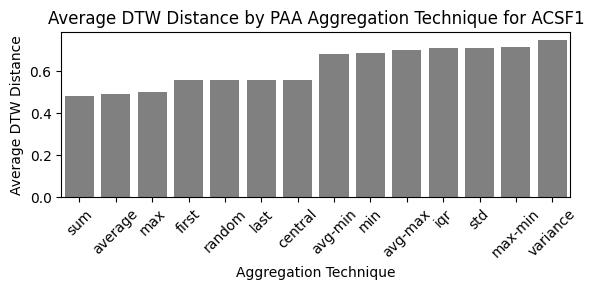

In [8]:
# Seleciona um dataset específico para análise detalhada
target_dataset = 'ACSF1'

# Filtra os resultados para o dataset alvo
filtered_results = dataset_agg_dtw_means[dataset_agg_dtw_means['dataset'] == target_dataset].copy()

# Ordena os resultados pela distância DTW média
filtered_results.sort_values(by='average_dtw', ascending=True, inplace=True)

# Plota um gráfico de barras com os resultados médios de DTW por técnica de agregação para o dataset selecionado
plt.figure(figsize=(6, 3))
sns.barplot(data=filtered_results, x='aggregation', y='average_dtw', color='gray')
plt.title(f'Average DTW Distance by PAA Aggregation Technique for {target_dataset}')
plt.xlabel('Aggregation Technique')
plt.ylabel('Average DTW Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Agrupa por taxa de redução e método de agregação, calculando a média da distância DTW
reduction_agg_dtw_means = paa_results.groupby(['reduction_rate', 'aggregation', 'dataset'])['dtw'].mean().reset_index()
# Renomeia a coluna de dtw para average_dtw
reduction_agg_dtw_means.rename(columns={'dtw': 'average_dtw'}, inplace=True)

reduction_agg_dtw_means

,reduction_rate,aggregation,dataset,average_dtw
0,0.1,average,ACSF1,0.074076
1,0.1,average,CinCECGTorso,0.000254
2,0.1,average,EOGHorizontalSignal,0.000056
3,0.1,average,EOGVerticalSignal,0.000075
4,0.1,average,EthanolLevel,0.000003
...,...,...,...,...
2641,0.9,variance,Rock,0.483735
2642,0.9,variance,SemgHandGenderCh2,0.524640
2643,0.9,variance,SemgHandMovementCh2,0.524640
2644,0.9,variance,SemgHandSubjectCh2,0.524640


In [12]:
# Cria uma tabela pivot com as médias de DTW para cada combinação de taxa de redução e técnica de agregação
pivot_table = reduction_agg_dtw_means.pivot(index='reduction_rate', columns='aggregation', values='average_dtw')
pivot_table

aggregation,average,avg-max,avg-min,central,first,iqr,last,max,max-min,min,random,std,sum,variance
reduction_rate,,,,,,,,,,,,,,
0.1,0.005093,1.190351,1.190351,0.006011,0.004807,1.190351,0.006011,0.004226,1.190351,0.006527,0.005380,1.190351,0.065269,1.265563
0.2,0.009976,0.981586,0.981586,0.010793,0.010499,0.981586,0.010793,0.008436,0.981586,0.012590,0.010685,0.981586,0.097436,1.065564
0.3,0.015101,0.794120,0.794120,0.016357,0.015653,0.794120,0.016357,0.012862,0.794120,0.018643,0.015985,0.794120,0.092806,0.888278
0.4,0.020255,0.601848,0.601848,0.021501,0.021841,0.601848,0.021501,0.018601,0.601848,0.025958,0.021964,0.601848,0.064404,0.712344
0.5,0.026211,0.400511,0.400511,0.027453,0.032996,0.400511,0.027453,0.025292,0.400511,0.036240,0.031824,0.400511,0.026239,0.551071
0.6,0.034135,0.385612,0.381801,0.034564,0.040578,0.383662,0.034652,0.035908,0.383662,0.042669,0.038775,0.367709,0.053092,0.525719
0.7,0.043863,0.314500,0.311406,0.049013,0.050016,0.313667,0.043392,0.046974,0.313052,0.051116,0.048112,0.307969,0.052397,0.443370
0.8,0.055725,0.263135,0.261618,0.059233,0.059889,0.267541,0.054066,0.059126,0.261111,0.063114,0.060165,0.260242,0.055860,0.372202
0.9,0.078616,0.241096,0.238849,0.081356,0.082417,0.240584,0.076059,0.083771,0.237712,0.086543,0.082413,0.239465,0.078780,0.341933


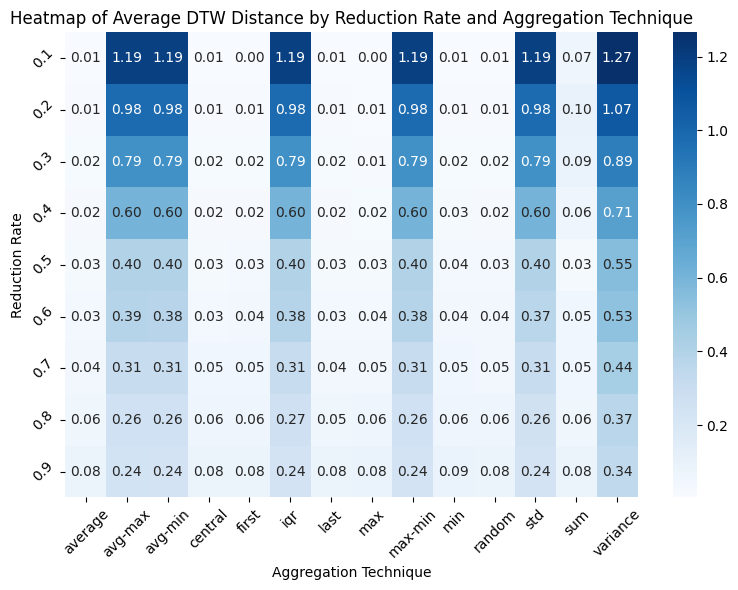

In [24]:
# Plota um heatmap para visualizar as médias de DTW por taxa de redução e técnica de agregação
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Blues')
plt.title('Heatmap of Average DTW Distance by Reduction Rate and Aggregation Technique')
plt.xlabel('Aggregation Technique')
plt.ylabel('Reduction Rate')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()